In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.multitest as smt
%matplotlib inline
plt.style.use('default')
from matplotlib.colors import hex2color, rgb2hex

#color = ["#e6194b","#3cb44b","#ffe119","#0082c8","#f58231","#911eb4","#46f0f0","#f032e6","#d2f53c","#fabebe","#008080","#e6beff","#aa6e28","#fffac8","#800000","#aaffc3","#808000","#ffd8b1","#000080","#808080","#FFFFFF","#000000"]

colors =['#E41A1C','#974661','#4A72A6','#3E8E93','#48A462','#5D995D','#7E6E85','#A35390','#D16948','#FF7F00','#FFB716','#FFF02D','#E1C62F','#B97B2A','#B75F49','#DB728C','#EC83BA','#C28EA9','#999999']
rgb_color = [hex2color(a) for a in colors]


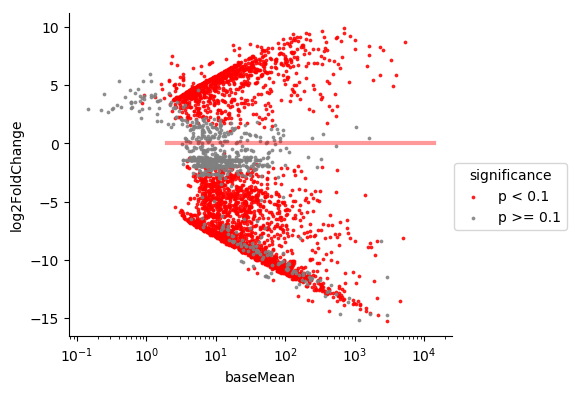

In [2]:
diff_OTU_HS = pd.read_csv("OTU_difference_res_SP_Hi.csv",sep=",",index_col=0)

diff_OTU_HS["significance"] = ""
diff_OTU_HS.loc[diff_OTU_HS["padj"] < 0.1,"significance"] = "p < 0.1"
diff_OTU_HS.loc[~(diff_OTU_HS["padj"] < 0.1),"significance"] = "p >= 0.1"

fgrid = sns.lmplot(x="baseMean",y="log2FoldChange",palette=["r","grey"],
                   data=diff_OTU_HS,fit_reg=False,hue="significance",
                   size=4,aspect=1.2,scatter_kws={"s": 3})
ax = fgrid.axes[0][0]
ax.set(xscale="log")
plt.plot(np.linspace(2,14000,1000), [0]*1000, 'r-',linewidth=3,alpha=0.4)
#plt.xlim([0,2000])



In [3]:
diff_OTU_HS.sort_index()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,significance
0,5271.547209,8.698270,0.737088,11.758946,6.352267e-32,3.184835e-30,p < 0.1
1,3984.763194,5.849816,0.312601,18.701714,4.793834e-78,8.772716e-75,p < 0.1
2,106.205829,7.114560,1.250075,5.619803,1.911756e-08,5.365817e-08,p < 0.1
3,3597.175440,4.939686,0.681601,7.226907,4.941199e-13,2.707304e-12,p < 0.1
4,3293.466195,7.123087,0.537301,13.232621,5.686895e-40,6.121775e-38,p < 0.1
5,4916.305936,-8.107726,0.658735,-12.270295,1.307755e-34,8.863670e-33,p < 0.1
6,2526.966173,8.037850,0.531329,15.088996,1.913311e-51,6.366107e-49,p < 0.1
7,2283.210011,5.875469,0.432166,13.580006,5.262178e-42,7.407528e-40,p < 0.1
8,429.935022,7.186787,1.113031,4.458639,8.248171e-06,1.578061e-05,p < 0.1
9,6.908976,2.889532,0.892438,3.211199,1.321824e-03,1.913716e-03,p < 0.1


In [4]:
print("Adjusted p-value < 0.1:")
print("LFC > 0 (up)     : "+ str(len(diff_OTU_HS[(diff_OTU_HS["log2FoldChange"] > 0)&(diff_OTU_HS["padj"]< 0.1)])) + ", " + str(len(diff_OTU_HS[(diff_OTU_HS["log2FoldChange"] > 0)&(diff_OTU_HS["padj"]< 0.1)])/len(diff_OTU_HS)*100) + "%")
print("LFC < 0 (down)   : "+ str(len(diff_OTU_HS[(diff_OTU_HS["log2FoldChange"] < 0)&(diff_OTU_HS["padj"]< 0.1)])) + ", " + str(len(diff_OTU_HS[(diff_OTU_HS["log2FoldChange"] <= 0)&(diff_OTU_HS["padj"]< 0.1)])/len(diff_OTU_HS)*100) + "%")


Adjusted p-value < 0.1:
LFC > 0 (up)     : 980, 25.823451910408433%
LFC < 0 (down)   : 2019, 53.201581027667984%


## R DESeq nomalized data 

In [5]:
## input R DESeq nomalized data
OTU_counts_nomalized = pd.read_csv("OTU_counts_nomalized.csv",sep=",",index_col=0)
OTU_counts_nomalized_relative = pd.read_csv("OTU_counts_nomalized_relative.csv",sep=",",index_col=0)
#OTU_counts_nomalized_relative.head()

OTU_table = pd.read_csv("../OTU_tax_table.txt",sep="\t",index_col=0)
#OTU_table_rela = OTU_table / OTU_table.sum() * 1000000
OTU_tax = OTU_table.iloc[:,-7:]

OTU_counts_nomalized_relative_tax = pd.merge(OTU_counts_nomalized_relative,OTU_tax,left_index=True,right_index=True,how="left")
OTU_counts_nomalized_relative_tax.to_csv("OTU_counts_nomalized_relative_tax.csv")

/Users/jzz0026/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


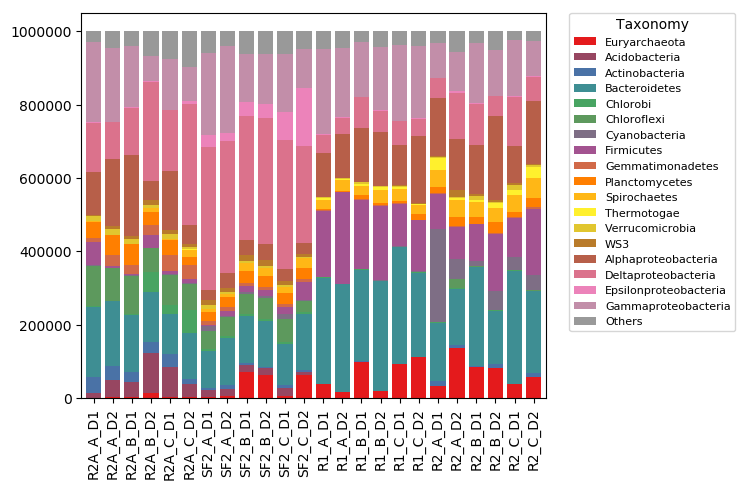

In [6]:
color = ["3cb44b","#ffe119","#0082c8","#f58231","#911eb4","#46f0f0","#f032e6","#d2f53c","#fabebe","#008080","#e6beff","#aa6e28","#fffac8","#800000","#aaffc3","#808000","#ffd8b1","#000080","#808080","#FFFFFF","#000000"]


sampl_col = OTU_counts_nomalized_relative_tax.columns[:24]
OTU_counts_nomalized_relative_tax["N_Phylum"] = OTU_counts_nomalized_relative_tax["Phylum"]
OTU_counts_nomalized_relative_tax.loc[OTU_counts_nomalized_relative_tax["N_Phylum"] == "Proteobacteria","N_Phylum"] = OTU_counts_nomalized_relative_tax.loc[OTU_counts_nomalized_relative_tax["N_Phylum"] == "Proteobacteria","Class"]

OTU_relative_counts_phylum = OTU_counts_nomalized_relative_tax.groupby("N_Phylum")[sampl_col].sum()

OTU_relative_counts_phylum_major = OTU_relative_counts_phylum[OTU_relative_counts_phylum.sum(1) / OTU_relative_counts_phylum.sum(1).sum() > 0.005]
others = OTU_relative_counts_phylum[OTU_relative_counts_phylum.sum(1) / OTU_relative_counts_phylum.sum(1).sum() <= 0.005]
others = pd.DataFrame(others.sum()).T
others.index = ["Others"]
OTU_relative_counts_phylum_N = pd.concat([OTU_relative_counts_phylum_major,others])

Plot_tax = OTU_counts_nomalized_relative_tax[["Kingdom","Phylum","Class"]].sort_values(["Kingdom","Phylum","Class"])
Plot_tax.loc[Plot_tax["Phylum"] == "Proteobacteria","Phylum"] = Plot_tax.loc[Plot_tax["Phylum"] == "Proteobacteria","Class"] 
Plot_tax = Plot_tax[["Kingdom","Phylum"]].drop_duplicates()
#Plot_tax = Plot_tax.set_index("Phylum")

OTU_relative_counts_phylum_N = OTU_relative_counts_phylum_N = pd.merge(OTU_relative_counts_phylum_N,Plot_tax,left_index=True,right_on="Phylum",how="left").sort_values(["Kingdom","Phylum"])
#.set_index("Phylum").iloc[:,:-1]
OTU_relative_counts_phylum_N["sort"] = OTU_relative_counts_phylum_N["Phylum"]
OTU_relative_counts_phylum_N.loc[OTU_relative_counts_phylum_N["Phylum"].str.contains("proteobacteria"),"sort"] = "proteobacteria_" + OTU_relative_counts_phylum_N.loc[OTU_relative_counts_phylum_N["Phylum"].str.contains("proteobacteria"),"sort"]
OTU_relative_counts_phylum_N = OTU_relative_counts_phylum_N.sort_values(["Kingdom","sort"]).set_index("Phylum").iloc[:,:-2]

OTU_relative_counts_phylum_N.T.plot(kind='bar', stacked=True,figsize=(6,5),width=0.8,colors=rgb_color)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 8}, title="Taxonomy")

#OTU_relative_counts_phylum_N

In [7]:
OTU_counts_nomalized_relative_tax

,R2A_A_D1,R2A_A_D2,R2A_B_D1,R2A_B_D2,R2A_C_D1,R2A_C_D2,SF2_A_D1,SF2_A_D2,SF2_B_D1,SF2_B_D2,...,R2_C_D1,R2_C_D2,Consensus lineage,Kingdom,Phylum,Class,Order,Family,Genus,N_Phylum
0,39.11,181.64,192.14,34.70,113.20,5.43,12.67,17.10,128.10,106.25,...,28628.41,13578.68,k__Bacteria;p__Bacteroidetes;c__Sphingobacteri...,Bacteria,Bacteroidetes,Sphingobacteria,Sphingobacteriales,Saprospiraceae,SaprospiraceaeFA,Bacteroidetes
1,1369.02,647.09,1062.13,271.79,452.78,27.15,158.41,199.52,312.56,318.75,...,33229.40,42634.07,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Marinovum,Alphaproteobacteria
2,0.00,5.68,5.34,5.78,5.66,0.00,0.00,5.70,5.12,5.59,...,2500.84,11798.62,k__Archaea;p__Euryarchaeota;c__Halobacteria;o_...,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,Halorubrum,Euryarchaeota
3,7688.87,817.37,1665.24,75.18,175.45,16.29,272.47,96.91,128.10,173.36,...,63469.77,11095.84,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Alteromonadaceae,Marinobacter,Gammaproteobacteria
4,16.76,238.40,480.36,86.74,175.45,27.15,12.67,62.71,102.48,128.62,...,37586.30,28244.88,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,GammaproteobacteriaCL,GammaproteobacteriaCL,GammaproteobacteriaCL,Gammaproteobacteria
5,19713.90,5034.80,9388.34,4059.49,1454.56,114.02,90118.18,68344.15,77242.33,80812.66,...,18.42,15.39,k__Bacteria;p__Proteobacteria;c__Deltaproteoba...,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfuromonadales,DesulfuromonadalesOR,DesulfuromonadalesOR,Deltaproteobacteria
6,134.11,124.88,128.10,34.70,28.30,16.29,0.00,5.70,46.11,55.92,...,38677.82,17810.79,k__Bacteria;p__Bacteroidetes;c__Sphingobacteri...,Bacteria,Bacteroidetes,Sphingobacteria,Sphingobacteriales,Balneolaceae,BalneolaceaeFA,Bacteroidetes
7,1307.55,192.99,661.83,104.09,124.51,48.87,139.40,131.11,66.61,83.88,...,20996.93,28916.89,k__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Marivita,Alphaproteobacteria
8,72.64,39.73,90.73,138.79,28.30,5.43,202.77,433.24,1885.58,1711.21,...,87.51,31358.69,k__Bacteria;p__Cyanobacteria;c__Chloroplast;o_...,Bacteria,Cyanobacteria,Chloroplast,Stramenopiles,StramenopilesOR,StramenopilesOR,Cyanobacteria
9,16.76,17.03,0.00,5.78,0.00,0.00,0.00,0.00,10.25,0.00,...,92.11,25.65,k__Archaea;p__Euryarchaeota;c__Halobacteria;o_...,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,HalobacteriaceaeFA,Euryarchaeota


## Significant difference of OTUs selected through corr

## merge abundance with env data

In [8]:
CHEM = pd.read_csv("/Users/jzz0026/Google_superjohnlove/jupyter/Saltpond/Wyatt_C-P_CH402/Salt_Pond_metaLOG_FIX.txt",sep="\t",index_col=3)
CHEM = CHEM.iloc[:,2:]
OTU_counts_nomalized_relative.loc[:-7]

## nomalized_relative
OTU_counts_nomalized_relative_Chem = pd.merge(OTU_counts_nomalized_relative.T,CHEM,left_index=True,right_index=True,how="left")
print("Number of all OTUs : " + str(len(OTU_counts_nomalized_relative_Chem.iloc[:,:-55].T)))

## nomalized 
OTU_counts_nomalized_Chem = pd.merge(OTU_counts_nomalized.T,CHEM,left_index=True,right_index=True,how="left")
OTU_counts_nomalized_Chem.columns[-55:]

Number of all OTUs : 3795


Index(['Sample_name', 'Site', 'Core', 'Depth', 'Restoration', 'Restoration2',
       'Hydrol', 'Date', 'Lat', 'Long', 'Salinity', 'Cond_uS_cm', 'Temp',
       'DO_perc', 'DO_mg_L', 'Redox', 'pH_YSI', 'CH4_umol_m2_d',
       'CO2_umol_m2_d', 'CH4_CO2', 'CH4_pos', 'CH4_CO2_pos', 'pH', 'Cl',
       'SO4_S', 'TOC', 'OM_LOI', 'C_Org_LOI', 'CaCO3', 'C', 'N', 'P', 'CN',
       'CP', 'NP', 'NO3', 'NH4', 'Olsen_P', 'NP_ext', 'NO3_NH4', 'K_ppm',
       'K_meq', 'Na_ppm', 'Na_meq', 'Ca', 'Mg', 'Zn', 'Mn', 'Cu', 'Fe',
       'CH4_m2_lin', 'CO2_m2_lin', 'Salinity_lin', 'pH_lin', 'CH4_pos_lin'],
      dtype='object')

## Calculate spearmanr with CH4_pos_lin and plot heatmap

In [9]:
## calculate spearmanr with CH4_pos_lin
colname = OTU_counts_nomalized_Chem.columns[:-55]
tt = []
for eachotu in colname:
    #cor = stats.spearmanr(OTU_counts_nomalized_relative_Chem[eachotu],OTU_counts_nomalized_relative_Chem["CH4_m2_lin"])
    cor = stats.pearsonr(OTU_counts_nomalized_Chem[eachotu],OTU_counts_nomalized_Chem["CH4_pos"])
    
    tt.append(list(cor))
Corr = pd.DataFrame(tt)
Corr.columns = ["OTU_corr","P-values"]
Corr["OTU_id"] = colname
df_spearmanr = Corr.set_index("OTU_id")

## calculate FDR
df_spearmanr["FDR"] = smt.fdrcorrection(df_spearmanr["P-values"], alpha=0.05, method='indep')[1]
Cor_counts_tax = pd.merge(df_spearmanr,OTU_counts_nomalized_relative_tax,left_index=True,right_index=True,how="left")

## Filter FDR < 0.05
Cor_counts_tax_FDR_f = Cor_counts_tax[(Cor_counts_tax["FDR"] < 0.05)]
Cor_tax_FDR_f = Cor_counts_tax_FDR_f[['OTU_corr', 'P-values', 'FDR','Consensus lineage', 'Kingdom',
       'Phylum', 'Class', 'Order', 'Family', 'Genus']]
Cor_tax_FDR_f.head()
print("Number of OTUs (FDR < 0.05) : " + str(len(Cor_counts_tax_FDR_f)))


Number of OTUs (FDR < 0.05) : 1021


In [10]:
print("Number of OTUs (FDR < 0.05 and corr > 0.5) : " + str(len(Cor_tax_FDR_f[abs(Cor_tax_FDR_f["OTU_corr"]) > 0.5])))


Number of OTUs (FDR < 0.05 and corr > 0.5) : 1007


In [11]:
def group_tax(OTU_counts_nomalized_relative_tax,tax):
    Sample_col = OTU_counts_nomalized_relative_tax.columns[:-7]
    Genus_counts = OTU_counts_nomalized_relative_tax.groupby(tax)[Sample_col].sum()

    Genus_counts = Genus_counts[Genus_counts.index.str[-2:] != "PH"]
    Genus_counts = Genus_counts[Genus_counts.index.str[-2:] != "OR"]
    Genus_counts = Genus_counts[Genus_counts.index.str[-2:] != "CL"]
    Genus_counts = Genus_counts[Genus_counts.index.str[-2:] != "FA"]

    Genus_counts_chem = pd.merge(Genus_counts.T,CHEM,left_index=True,right_index=True,how="left")

    colname = Genus_counts_chem.columns[:-55]
    tt = []
    for eachotu in colname:
        cor = stats.spearmanr(Genus_counts_chem[eachotu],Genus_counts_chem["CH4_pos_lin"])
        tt.append(list(cor))
    
    
    Corr = pd.DataFrame(tt)
    Corr.columns = ["corr","P-values"]
    Corr["ID"] = colname
    df_spearmanr = Corr.set_index("ID")

    ## calculate FDR
    df_spearmanr["FDR"] = smt.fdrcorrection(df_spearmanr["P-values"], alpha=0.05, method='indep')[1]
    #df_spearmanr = df_spearmanr[df_spearmanr["FDR"] < 0.05]
    df_spearmanr.index.name = tax
    
    return df_spearmanr

Phylum_cor = group_tax(OTU_counts_nomalized_relative_tax,"Phylum")[["corr"]]
Class_cor = group_tax(OTU_counts_nomalized_relative_tax,"Class")[["corr"]]
Order_cor = group_tax(OTU_counts_nomalized_relative_tax,"Order")[["corr"]]
Family_cor = group_tax(OTU_counts_nomalized_relative_tax,"Family")[["corr"]]
Genus_cor = group_tax(OTU_counts_nomalized_relative_tax,"Genus")[["corr"]]

df_tt = pd.merge(Cor_tax_FDR_f,Genus_cor,left_on="Genus",right_index=True,how="left")
df_tt = pd.merge(df_tt,Family_cor,left_on="Family",right_index=True,how="left")
df_tt = pd.merge(df_tt,Order_cor,left_on="Order",right_index=True,how="left")
df_tt = pd.merge(df_tt,Class_cor,left_on="Class",right_index=True,how="left")
df_tt = pd.merge(df_tt,Phylum_cor,left_on="Phylum",right_index=True,how="left")
df_tt.columns = ['OTU_corr', 'P-values', 'FDR', 'Consensus lineage', 'Kingdom', 'Phylum',
       'Class', 'Order', 'Family', 'Genus', "Genus_corr","Family_corr","Order_corr","Class_corr","Phylum_corr"]#[-5:] = ["Genus_corr","Family_corr","Order_corr","Class_corr","Phylum_corr"]
df_corr = df_tt[['Consensus lineage','OTU_corr','Genus_corr', 'Family_corr','Order_corr', 'Class_corr', 'Phylum_corr']]


In [12]:
#df_corr[df_corr["Genus_corr"].notnull()].sort_values("Genus_corr")

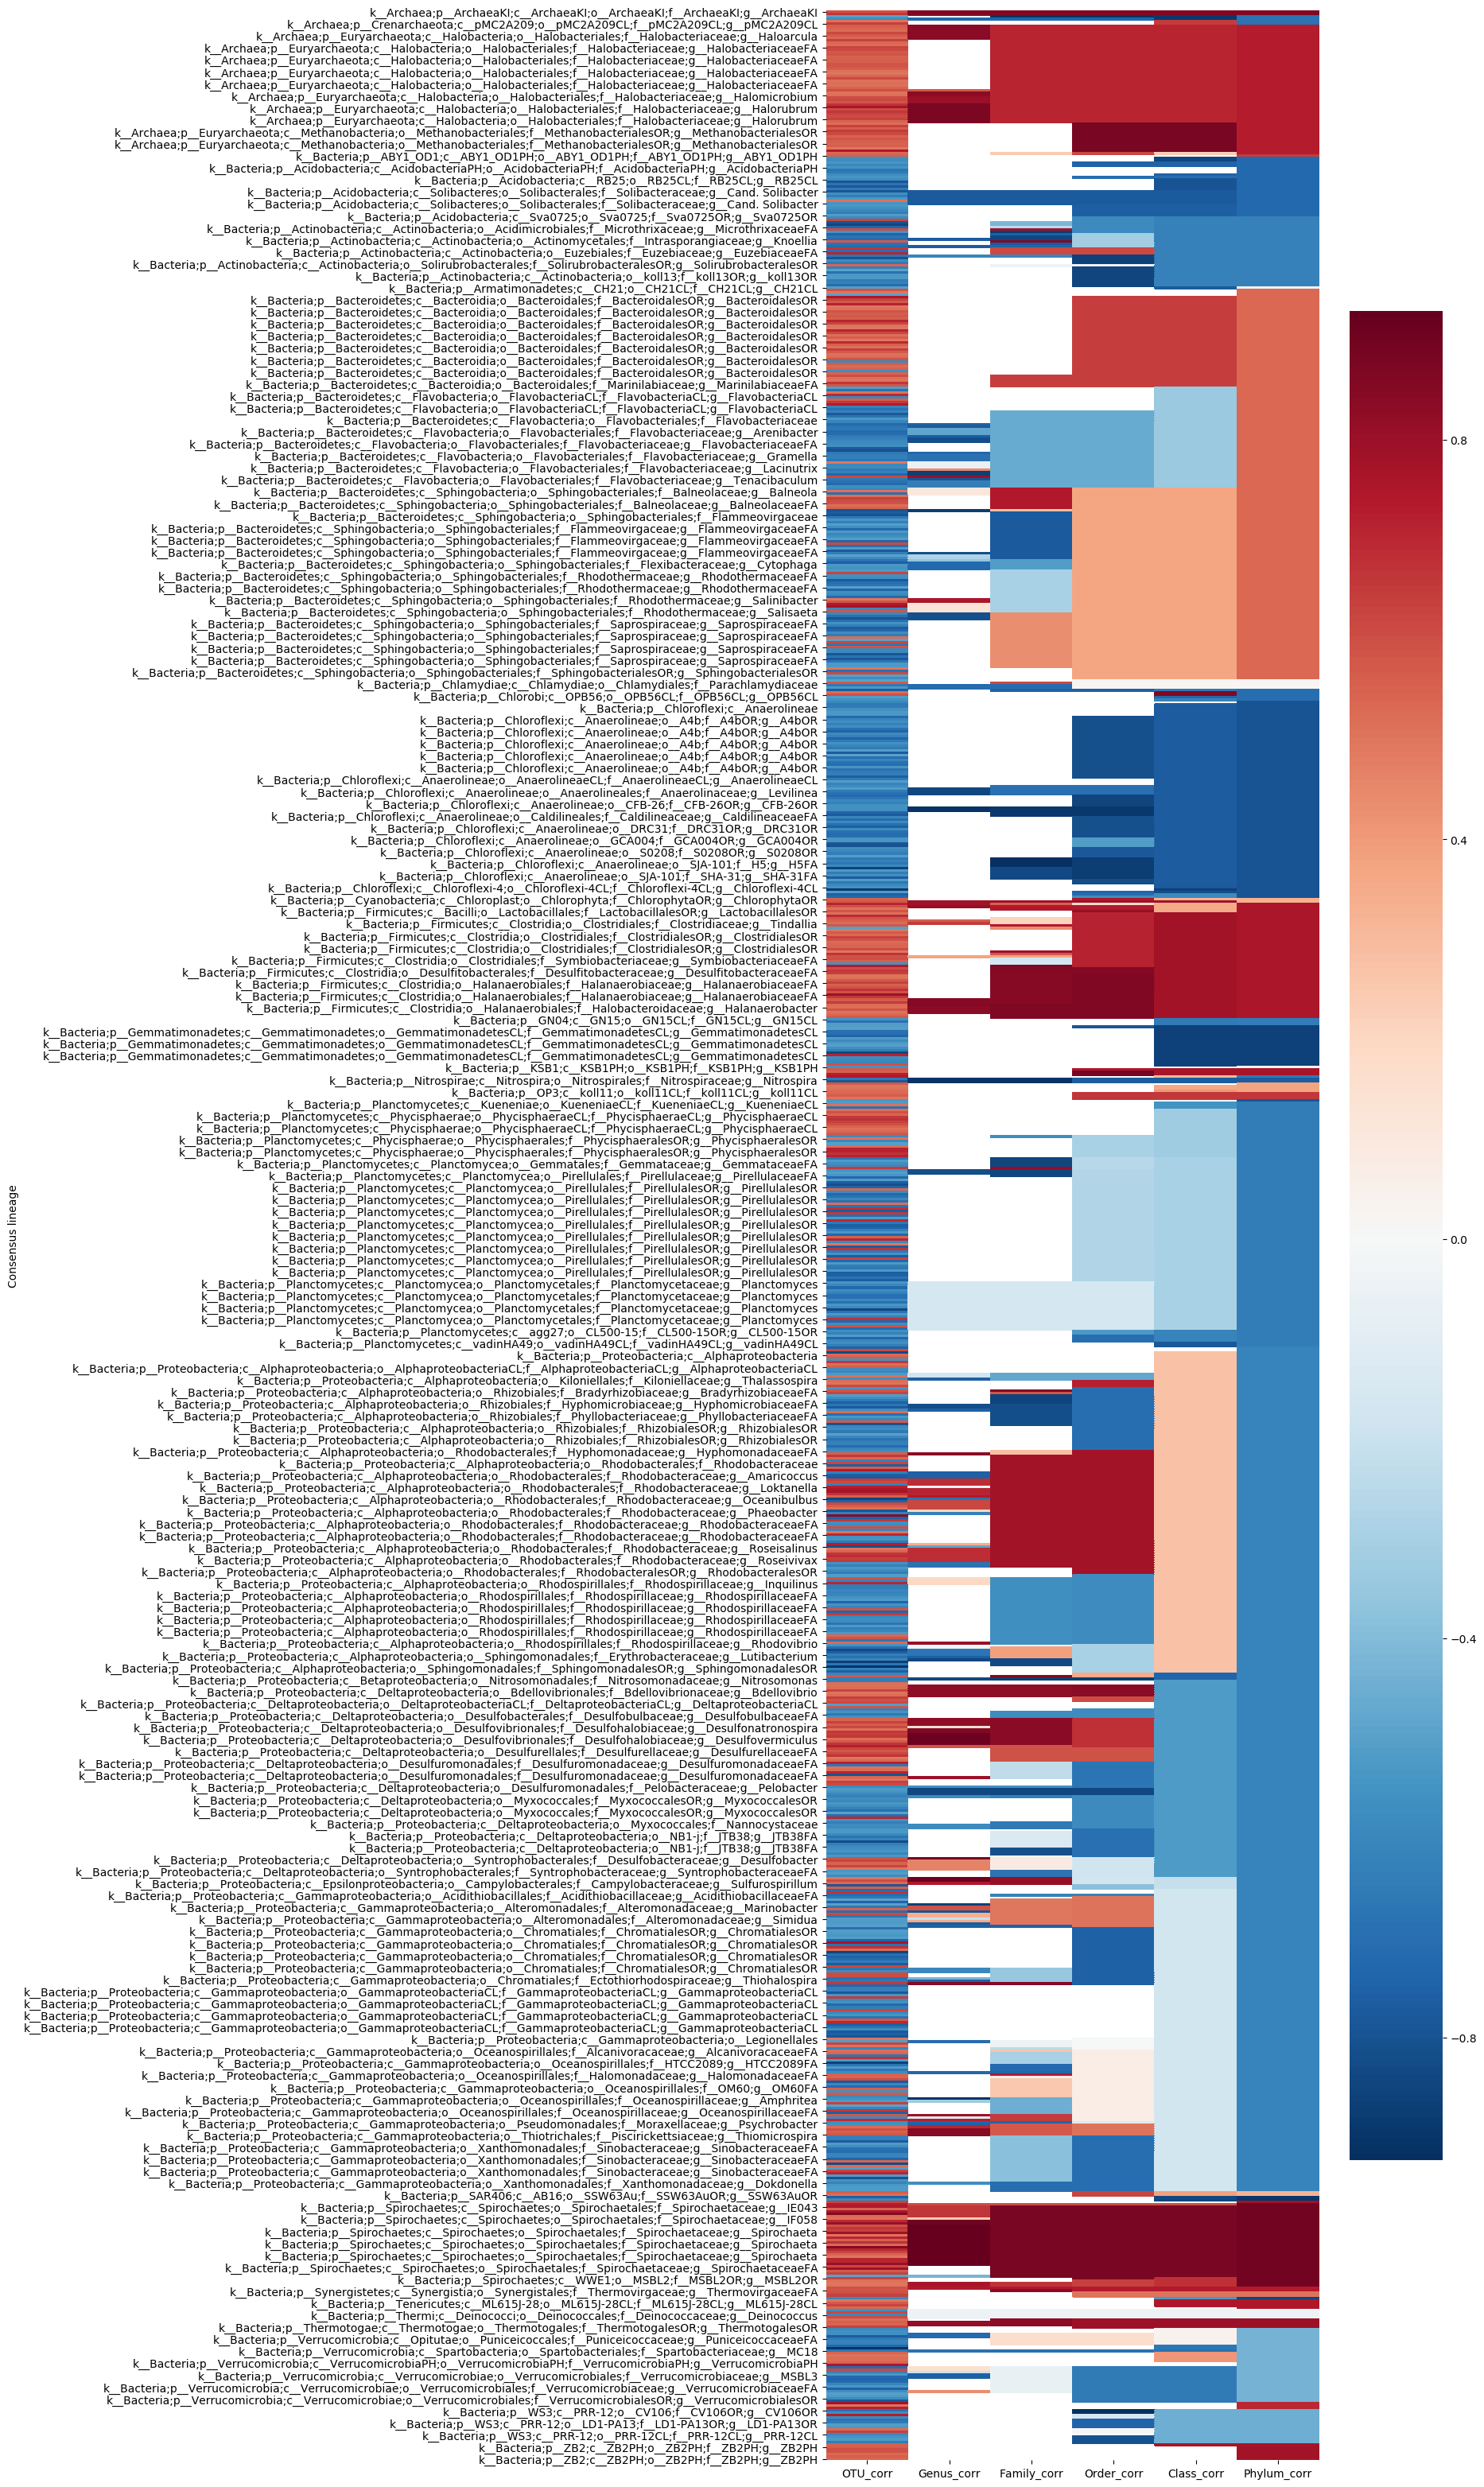

In [13]:
df_HM_plot = df_corr.set_index("Consensus lineage")
df_HM_plot= df_HM_plot.sort_index()
plt.figure(figsize = (10,40))
sns.heatmap(df_HM_plot,cmap="RdBu_r")

In [14]:
OTU_counts_nomalized_relative_Chem_c = OTU_counts_nomalized_relative_Chem.copy()
OTU_counts_nomalized_relative_Chem_c.iloc[:,:-55] = np.log10(OTU_counts_nomalized_relative_Chem_c.iloc[:,:-55].replace(0,1))
tt = []
for eachotu in colname:
    cor = stats.pearsonr(OTU_counts_nomalized_relative_Chem_c[eachotu],OTU_counts_nomalized_relative_Chem_c["CH4_pos"])
    tt.append(list(cor))
Corr = pd.DataFrame(tt)
Corr.columns = ["OTU_corr","P-values"]
Corr["OTU_id"] = colname
df_personr = Corr.set_index("OTU_id")

## calculate FDR
df_personr["FDR"] = smt.fdrcorrection(df_personr["P-values"], alpha=0.05, method='indep')[1]
Cor_counts_tax = pd.merge(df_personr,OTU_counts_nomalized_relative_tax,left_index=True,right_index=True,how="left")

## Filter FDR < 0.05
Cor_counts_tax_FDR_f = Cor_counts_tax[(Cor_counts_tax["FDR"] < 0.05)]
Cor_tax_FDR_f = Cor_counts_tax_FDR_f[['OTU_corr', 'P-values', 'FDR','Consensus lineage', 'Kingdom',
       'Phylum', 'Class', 'Order', 'Family', 'Genus']]
Cor_tax_FDR_f.head()
print("Number of OTUs (FDR < 0.05) : " + str(len(Cor_counts_tax_FDR_f)))

Number of OTUs (FDR < 0.05) : 2644


## Family and Genus abudance based on corr

/Users/jzz0026/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


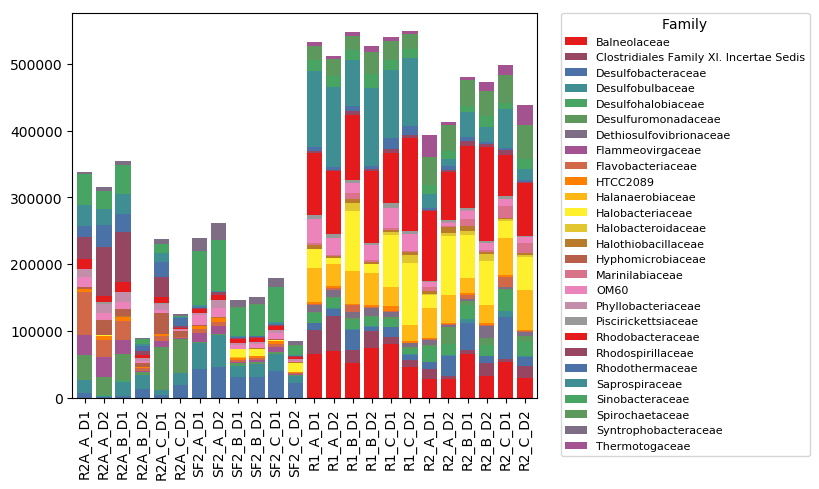

In [15]:
Pos_otu = Cor_tax_FDR_f[abs(Cor_tax_FDR_f["OTU_corr"]) > 0.7].index
OTU_counts_nomalized_relative_tax_pos = OTU_counts_nomalized_relative_tax.loc[Pos_otu]
Tax_group = OTU_counts_nomalized_relative_tax_pos.groupby("Family")[sampl_col].sum()
#.T.plot(kind='bar', stacked=True,figsize=(6,5),width=0.8,colors=rgb_color)
Tax_group_filter = Tax_group[Tax_group.sum(1) > 50000]
## remove taxonomies below 0.5%
#Tax_group_filter = Tax_group[Tax_group.sum(1) / Tax_group.sum(1).sum() > 0.01]


Tax_group_filter = Tax_group_filter[Tax_group_filter.index.str[-2:] != "PH"]
Tax_group_filter = Tax_group_filter[Tax_group_filter.index.str[-2:] != "OR"]
Tax_group_filter = Tax_group_filter[Tax_group_filter.index.str[-2:] != "CL"]
Tax_group_filter = Tax_group_filter[Tax_group_filter.index.str[-2:] != "FA"]

Tax_group_filter.T.plot(kind='bar', stacked=True,figsize=(6,5),width=0.8,colors=rgb_color)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 8}, title="Family")

/Users/jzz0026/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


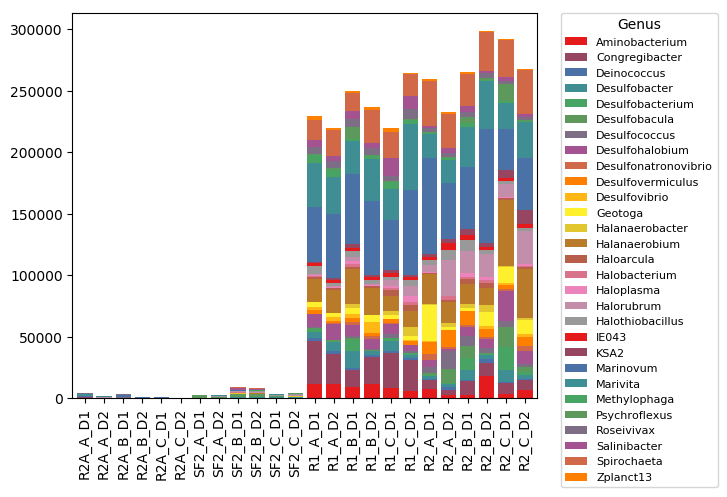

In [16]:
Pos_otu = Cor_tax_FDR_f[Cor_tax_FDR_f["OTU_corr"] > 0.7].index
OTU_counts_nomalized_relative_tax_pos = OTU_counts_nomalized_relative_tax.loc[Pos_otu]
Tax_group = OTU_counts_nomalized_relative_tax_pos.groupby("Genus")[sampl_col].sum()
#.T.plot(kind='bar', stacked=True,figsize=(6,5),width=0.8,colors=rgb_color)
Tax_group_filter = Tax_group[Tax_group.sum(1) > 15000]
## remove taxonomies below 0.5%
#Tax_group_filter = Tax_group[Tax_group.sum(1) / Tax_group.sum(1).sum() > 0.01]


Tax_group_filter = Tax_group_filter[Tax_group_filter.index.str[-2:] != "PH"]
Tax_group_filter = Tax_group_filter[Tax_group_filter.index.str[-2:] != "OR"]
Tax_group_filter = Tax_group_filter[Tax_group_filter.index.str[-2:] != "CL"]
Tax_group_filter = Tax_group_filter[Tax_group_filter.index.str[-2:] != "FA"]

Tax_group_filter.T.plot(kind='bar', stacked=True,figsize=(6,5),width=0.8,colors=rgb_color)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 8}, title="Genus")

/Users/jzz0026/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


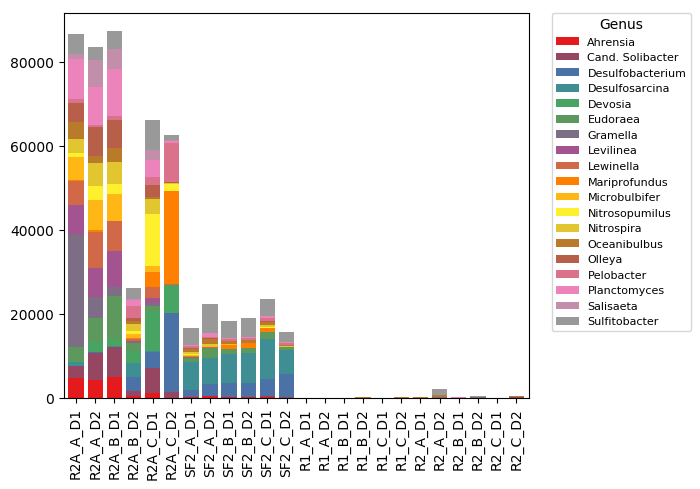

In [17]:
Pos_otu = Cor_tax_FDR_f[Cor_tax_FDR_f["OTU_corr"] < -0.7].index
OTU_counts_nomalized_relative_tax_pos = OTU_counts_nomalized_relative_tax.loc[Pos_otu]
Tax_group = OTU_counts_nomalized_relative_tax_pos.groupby("Genus")[sampl_col].sum()
#.T.plot(kind='bar', stacked=True,figsize=(6,5),width=0.8,colors=rgb_color)
Tax_group_filter = Tax_group[Tax_group.sum(1) > 15000]
## remove taxonomies below 0.5%
#Tax_group_filter = Tax_group[Tax_group.sum(1) / Tax_group.sum(1).sum() > 0.01]


Tax_group_filter = Tax_group_filter[Tax_group_filter.index.str[-2:] != "PH"]
Tax_group_filter = Tax_group_filter[Tax_group_filter.index.str[-2:] != "OR"]
Tax_group_filter = Tax_group_filter[Tax_group_filter.index.str[-2:] != "CL"]
Tax_group_filter = Tax_group_filter[Tax_group_filter.index.str[-2:] != "FA"]

Tax_group_filter.T.plot(kind='bar', stacked=True,figsize=(6,5),width=0.8,colors=rgb_color)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 8}, title="Genus")


## Source Track

Text(0.5,0.75,'Source track of restored saltpond samples')

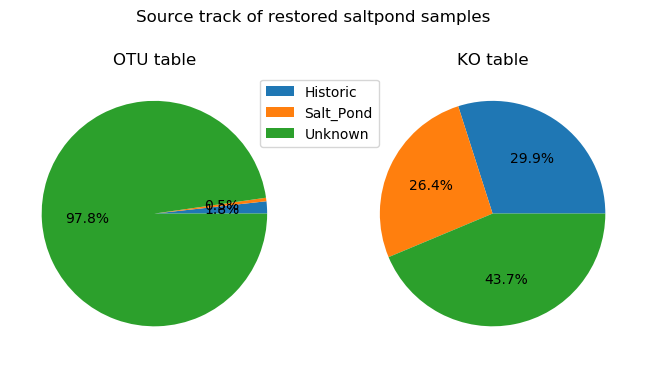

In [18]:
df_OTU_st = pd.read_csv("../sourcetrack/test/mixing_proportions.txt",sep="\t")
df_KO_st = pd.read_csv("../sourcetrack/test2/mixing_proportions.txt",sep="\t")

fig = plt.figure(figsize=(8,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
pie1 = df_OTU_st.iloc[:,1:].mean().plot.pie(subplots=True,legend = True,labels=None,ax=ax1,autopct='%.1f%%')
plt.title("OTU table")
plt.ylabel("")
#L = plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.,prop={'size': 8})
#L.get_texts()
#.groupby("SampleID")[["Historic","Salt_Pond","Unknown"]].sum()

ax2 = plt.subplot(122, aspect='equal')
plt.title("KO table")
pie2 = df_KO_st.iloc[:,1:].mean().plot.pie(subplots=True,ax=ax2,labels=None,autopct='%.1f%%')
plt.ylabel("")

plt.legend(("Historic","Salt_Pond","Unknown"),bbox_to_anchor=(0.12, 1))
fig.suptitle('Source track of restored saltpond samples',x=0.5,y=0.75) 

In [19]:
df_KO_st.iloc[:,1:].mean()

Historic     0.2993
Salt_Pond    0.2638
Unknown      0.4369
dtype: float64

## Taxonomic Guild analysis

/Users/jzz0026/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


1. Methanogenesis is high in Saltpond
2.


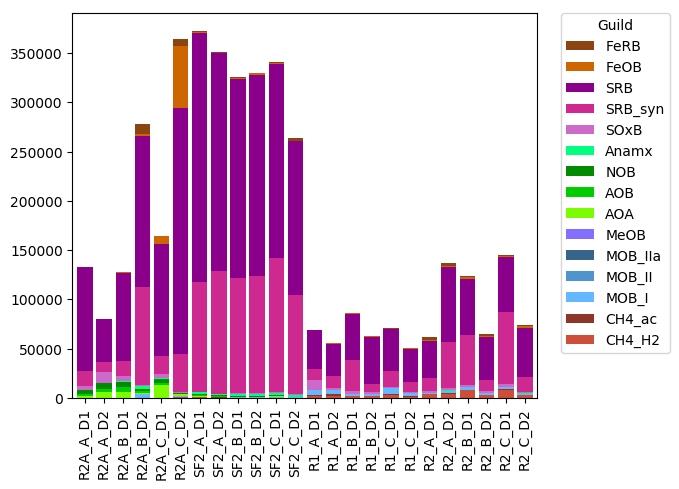

In [20]:
## import Guild_OTUs_name
Guild_OTUs = pd.read_csv("Guild_analysis/Guild_OTUs_name.csv").iloc[:,1:]
Guild_OTUs_rel_counts = pd.merge(Guild_OTUs,OTU_counts_nomalized_relative_tax,left_on="OTU",right_index=True,how="left")
Guild_OTUs_rel_counts_group = Guild_OTUs_rel_counts.groupby("Guild")[sampl_col].sum()

## imort colors for guild
Guild_colors = pd.read_csv("Guild_analysis/Guild_colors.csv").iloc[:,1:]
Guild_OTUs_rel_counts_group = pd.merge(Guild_colors,Guild_OTUs_rel_counts_group,left_on="Guild",right_index=True,how="left")
Guild_OTUs_rel_counts_group = Guild_OTUs_rel_counts_group.set_index("Guild").T
ax = Guild_OTUs_rel_counts_group.loc[sampl_col].plot(kind='bar', stacked=True,figsize=(6,5),width=0.8,colors=Guild_OTUs_rel_counts_group.loc["color"])

## reverse order of legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 10},title='Guild')
print("1. Methanogenesis is high in Saltpond\n2.")

In [21]:
Guild_OTUs_rel_counts.groupby("Guild")[sampl_col].sum().T
Guild_colors
#[Guild_OTUs_rel_counts["Genus"] == "Nitrosopumilus"]
#Guild_OTUs_rel_counts[Guild_OTUs_rel_counts["Guild"] == "SRB"].groupby("Genus")[sampl_col].sum()#.T.plot(kind='bar', stacked=True,figsize=(6,5),width=0.8,colors=Guild_OTUs_rel_counts_group.loc["color"])

,Guild,color,G_index
0,CH4_H2,#CD4F39,1
1,CH4_ac,#8B3626,2
2,MOB_I,#63B8FF,3
3,MOB_II,#4F94CD,4
4,MOB_IIa,#36648B,5
5,MeOB,#836FFF,6
6,AOA,#7CFC00,7
7,AOB,#00CD00,8
8,NOB,#008B00,9
9,Anamx,#00FF7F,10


In [22]:
Genus_group = Guild_OTUs_rel_counts.groupby(["Guild"])[sampl_col].sum()
Genus_group_chem = pd.merge(Genus_group.T,CHEM,left_index=True,right_index=True)
Genus_group_chem.corr(method="spearman").loc["CH4_m2_lin",Genus_group_chem.columns[:-55]].sort_values(ascending=True)

NOB       -0.903956
AOA       -0.891332
AOB       -0.878286
Anamx     -0.547517
MeOB      -0.538306
SRB       -0.489976
SRB_syn   -0.183087
FeOB      -0.001744
SOxB       0.078466
FeRB       0.200524
MOB_I      0.592853
CH4_ac     0.737984
CH4_H2     0.871843
Name: CH4_m2_lin, dtype: float64

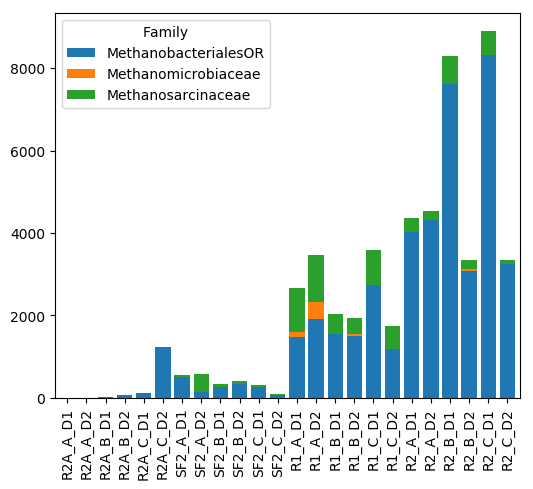

In [25]:
Guild_OTUs_rel_CH4_H2_ac = Guild_OTUs_rel_counts[(Guild_OTUs_rel_counts["Guild"] == "CH4_H2") | (Guild_OTUs_rel_counts["Guild"] == "CH4_ac")]

plt.figure(figsize=(8,8))
Guild_OTUs_rel_CH4_H2_ac.groupby("Family").sum().iloc[:,1:].T.plot(kind='bar', stacked=True,figsize=(6,5),width=0.8)
#.sort_values().plot.pie(autopct='%.1f%%')
#plt.ylabel("")
#plt.title("IMG phylogenies of phnJ identified from scaffolds of unrestored salt ponds",fontsize=16)

/Users/jzz0026/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


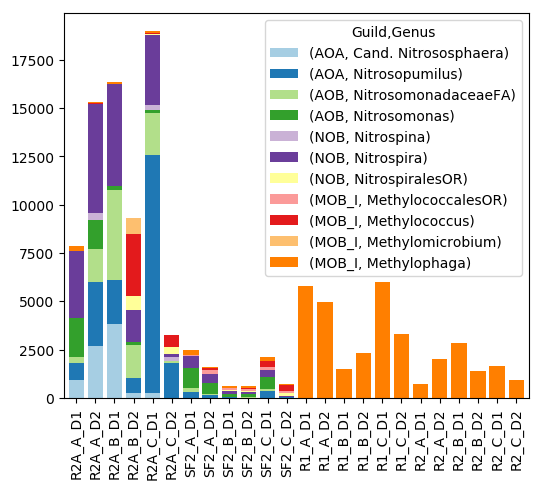

In [26]:
Guild_OTUs_rel_NH4_CH4 = Guild_OTUs_rel_counts[(Guild_OTUs_rel_counts["Guild"] == "MOB_I")|(Guild_OTUs_rel_counts["Guild"] == "AOA")|(Guild_OTUs_rel_counts["Guild"] == "AOB")|(Guild_OTUs_rel_counts["Guild"] == "NOB")]
Guild_OTUs_rel_NH4_CH4 = Guild_OTUs_rel_NH4_CH4.groupby(["Guild","Genus"]).sum()#
Guild_OTUs_rel_NH4_CH4 = pd.concat([Guild_OTUs_rel_NH4_CH4.loc[["AOA","AOB","NOB"]],Guild_OTUs_rel_NH4_CH4.loc[["MOB_I"]]])

colors = sns.color_palette("Paired",11)
colors = colors[:4]+colors[-3:]+colors[4:-3]
Guild_OTUs_rel_NH4_CH4.iloc[:,1:].T.plot(kind='bar', stacked=True,figsize=(6,5),width=0.8,colors=colors)


In [27]:
Genus_group = Guild_OTUs_rel_counts.groupby(["Guild"])[sampl_col].sum()
Genus_group_chem = pd.merge(Genus_group.T,CHEM,left_index=True,right_index=True)
Genus_group_chem.corr(method="spearman").loc["CH4_m2_lin",Genus_group_chem.columns[:-55]].sort_values(ascending=True)

NOB       -0.903956
AOA       -0.891332
AOB       -0.878286
Anamx     -0.547517
MeOB      -0.538306
SRB       -0.489976
SRB_syn   -0.183087
FeOB      -0.001744
SOxB       0.078466
FeRB       0.200524
MOB_I      0.592853
CH4_ac     0.737984
CH4_H2     0.871843
Name: CH4_m2_lin, dtype: float64